In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from utils import to_datetime, inspect_null, try_drop_shared_nulls, drop_full_zero

In [3]:
with open("data/energy_dataset.csv") as file:
    en = pd.read_csv(file, sep=",")
    en.name = "energy"

en = to_datetime(en, "time")

# drop nulls
try: 
    en.drop(
    [
        "generation hydro pumped storage aggregated",
        "forecast wind offshore eday ahead",
    ],
    axis=1,
    inplace=True,
)
except KeyError:
    pass
en = try_drop_shared_nulls(en, any_null=True)

# drop features with only zero values
en = drop_full_zero(en)

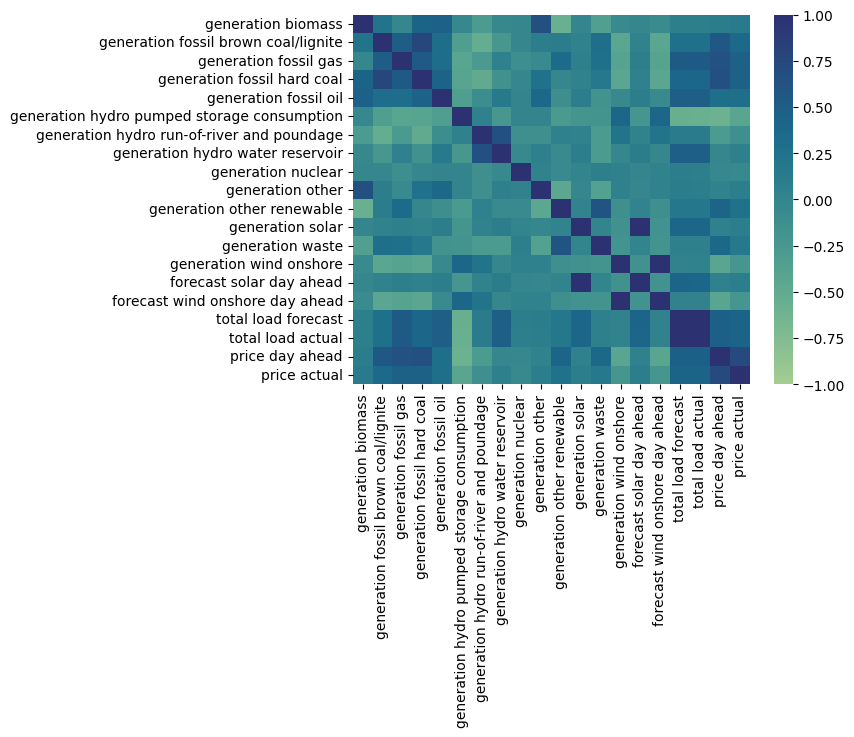

In [54]:
corr = en[en.columns[~en.columns.isin(["datetime"])]].corr()
sns.heatmap(
    corr,
    vmin=-1.0,
    vmax=1.0,
    cmap="crest",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=False,
)
plt.show()

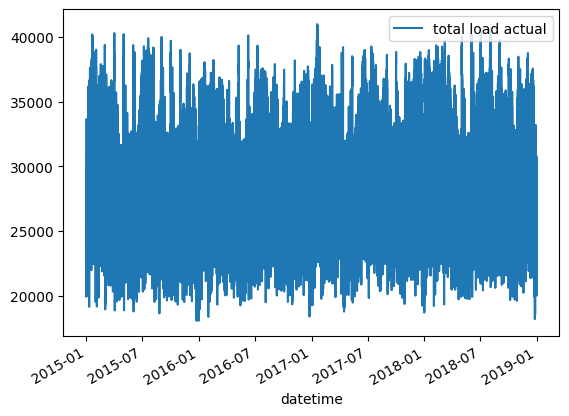

In [57]:
en.plot(x="datetime", y=["total load actual"])
plt.show()

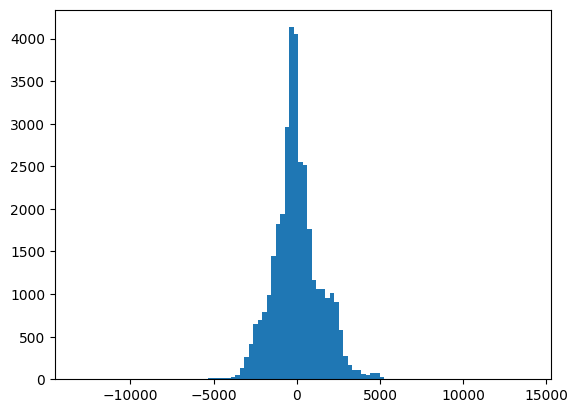

In [63]:
plt.hist(en["total load actual"].diff(), bins=100)
plt.show()